In [1]:
from CNN import tCNN

### Getting Data

In [2]:
import pickle
with open('Data_simple.pkl', 'rb') as f:
    Final = pickle.load(f)
    
X = Final[0]
Y = Final[1]

### Random Shuffle

In [3]:
import random

XY = list(zip(X, Y))
random.shuffle(XY)

X, Y = zip(*XY)

Using TensorFlow backend.









__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 10, 10, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 14, 14, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_2 (ZeroPadding2D (None, 14, 14, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
zero_padding2d_3 (ZeroPadding2D (None, 14, 14, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
con

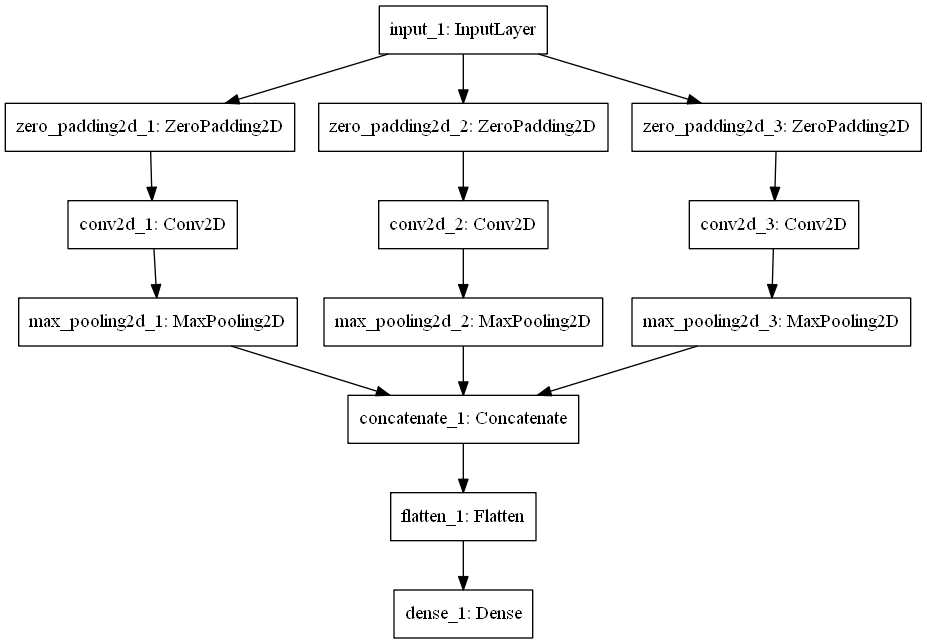

In [4]:
tCNN()


from keras.utils import plot_model
from IPython.display import Image
from keras.models import load_model

model = load_model('CNN_model_init.h5')
plot_model(model, to_file='CNN_arch.png')
Image(filename='./CNN_arch.png')

## Reshaping array

In [5]:
import numpy as np

X = np.asarray(X)
Y = np.asarray(Y)

X = X.reshape(X.shape[0], X.shape[1], X.shape[2], 1)
Y = Y.reshape(Y.shape[0], 1)

print(f"X shape : {X.shape}\nY shape : {Y.shape}")

X shape : (169, 10, 10, 1)
Y shape : (169, 1)


In [6]:
x_train = X[0:140]
y_train = Y[0:140]

x_test = X[140:]
y_test = Y[140:]

### Training Model

In [7]:
# callback function
import keras
class myCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('acc')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
        
callback = myCallback()

model.fit(x_train, y_train,
          epochs=1000,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks=[callback])

try:
    model.save('CNN_model_final.h5')
    print("Model Saved!")
except:
    print("Error in saving Model")

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 140 samples, validate on 29 samples
Epoch 1/1000
140/140 [==============================] - 3s 25ms/step - loss: 1.9851 - acc: 0.1714 - val_loss: 1.7704 - val_acc: 0.2414
Epoch 2/1000
140/140 [==============================] - 0s 845us/step - loss: 1.6425 - acc: 0.4214 - val_loss: 1.4793 - val_acc: 0.6897
Epoch 3/1000
140/140 [==============================] - 0s 831us/step - loss: 1.3076 - acc: 0.7714 - val_loss: 1.2122 - val_acc: 0.8966
Epoch 4/1000
140/140 [==============================] - 0s 834us/step - loss: 1.0915 - acc: 0.9143 - val_loss: 1.0462 - val_acc: 0.8966

Reached 90% accuracy so cancelling training!
Model Saved!


In [8]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[1.0462268590927124, 0.8965517282485962]

In [9]:
classes = model.predict(x_test)
print(classes)

[[0.12710166 0.32723385 0.02161129 0.1681077  0.05431172 0.17366171
  0.0378987  0.09007342]
 [0.15275976 0.1056531  0.05615436 0.27091458 0.08059826 0.14312914
  0.06518617 0.12560457]
 [0.09970724 0.0960961  0.03719254 0.17257865 0.05173674 0.34628808
  0.05972452 0.1366761 ]
 [0.19426194 0.11508184 0.03119765 0.31339785 0.045022   0.15778565
  0.04815019 0.09510289]
 [0.09327529 0.11021741 0.04118886 0.18993862 0.05712535 0.32376733
  0.04982246 0.13466464]
 [0.10262518 0.3714918  0.02241435 0.22638798 0.04550215 0.1040217
  0.0432786  0.08427828]
 [0.2490346  0.11661071 0.05023219 0.1754992  0.07291094 0.1358157
  0.09025069 0.10964599]
 [0.12722954 0.1046961  0.04841676 0.37151638 0.06680369 0.12665184
  0.05448355 0.10020211]
 [0.11108464 0.45919052 0.01359465 0.18057404 0.03907213 0.11081341
  0.02886761 0.05680307]
 [0.34514293 0.09430511 0.02691679 0.18148464 0.04033063 0.16508077
  0.04840254 0.09833648]
 [0.03740564 0.00647399 0.00481546 0.03468909 0.84325635 0.021516
  0.00

In [15]:
classes.shape

(29, 8)

In [16]:
x_test.shape

(29, 10, 10, 1)

In [17]:
y_test[0]

array([5])